In [6]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 下载并加载数据
data_url = "http://www.aueb.gr/users/ion/data/enron-spam/"
# 假设已经下载并解压到本地
spam_data = pd.read_csv("enron_spam_data.csv")
spam_data.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


In [7]:
# 数据预处理
def preprocess_text(text):
    # 清理和标准化文本
    text = text.lower()  # 转换为小写
    # 进一步清理，例如去掉标点符号等
    return text

spam_data['Message'] = spam_data['Message'].astype(str)
spam_data['cleaned_text'] = spam_data['Message'].apply(preprocess_text)

# 特征提取
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(spam_data['cleaned_text'])
y = spam_data['Spam/Ham']  # 假设有 'label' 列表示垃圾邮件或非垃圾邮件

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# 使用朴素贝叶斯作为基础模型
model = MultinomialNB()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
from sklearn.metrics import classification_report

# 生成 classification_report 字典格式
report = classification_report(y_test, y_pred, output_dict=True)

# 修改每个值为四位小数
for label in report:
    if label != 'accuracy':  # 'accuracy' 可能不是数值类型
        for metric in report[label]:
            report[label][metric] = round(report[label][metric], 4)

# 输出修改后的 classification_report
print("Classification Report (with 4 decimal places):")
print(report)

# print(classification_report(y_test, y_pred))


Accuracy: 0.9840
Classification Report (with 4 decimal places):
{'ham': {'precision': 0.9829, 'recall': 0.9841, 'f1-score': 0.9835, 'support': 3276.0}, 'spam': {'precision': 0.985, 'recall': 0.9839, 'f1-score': 0.9844, 'support': 3468.0}, 'accuracy': 0.9839857651245552, 'macro avg': {'precision': 0.984, 'recall': 0.984, 'f1-score': 0.984, 'support': 6744.0}, 'weighted avg': {'precision': 0.984, 'recall': 0.984, 'f1-score': 0.984, 'support': 6744.0}}


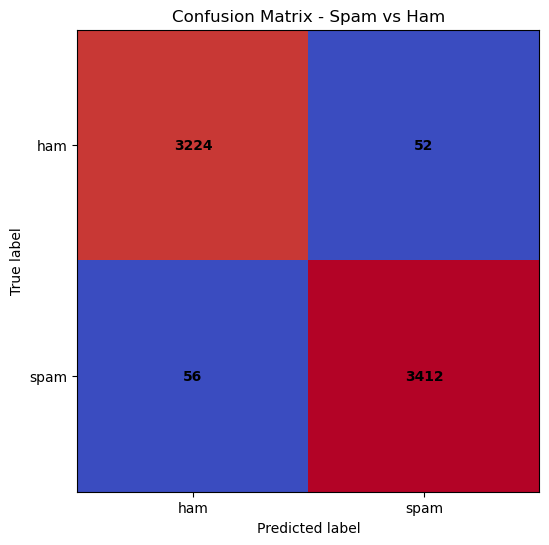

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 设置自定义标签
labels = ['ham', 'spam']

# 绘制混淆矩阵并设置配色与标签
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# 更改配色方案
fig, ax = plt.subplots(figsize=(6, 6))  # 设置大小
disp.plot(cmap='coolwarm', values_format='d', colorbar=False, ax=ax)

# 修改中间数字的字体样式
for i in range(cm.shape[0]):  # 遍历矩阵的每个位置
    for j in range(cm.shape[1]):
        # 访问每个文本对象
        text = disp.text_[i, j]
        text.set_fontweight('bold')  # 设置粗体
        text.set_color('black')      # 设置字体颜色为黑色

# 设置标题
plt.title('Confusion Matrix - Spam vs Ham')

# 显示图形
plt.show()
